In [8]:
!pip install rioxarray
import xarray as xr
import rioxarray 
from pathlib import Path
import pandas as pd
import numpy as np

In [9]:

def get_bounding_box_max_min_lat_long_values(country_name, df_bounding_boxes):
    # Get min of lat and long for the country
    min_long = df_bounding_boxes[df_bounding_boxes['country'] == country_name]['longmin']
    min_lat = df_bounding_boxes[df_bounding_boxes['country'] == country_name]['latmin']
    # Get max of lat and long for the country
    max_long = df_bounding_boxes[df_bounding_boxes['country'] == country_name]['longmax']
    max_lat = df_bounding_boxes[df_bounding_boxes['country'] == country_name]['latmax']
    return  min_long, min_lat, max_long, max_lat

def get_location_names():
    df_bounding_boxes = pd.read_csv('/Users/kevinha/VYPREarth/country-boundingboxes.csv')
    country_names_list = df_bounding_boxes['country'].to_list()
    return country_names_list, df_bounding_boxes

def get_clipped_xarray_dataset(ds, country_name, df_bounding_boxes):
    # CRS code 
    dsc = ds.rio.write_crs(4326) # Need to specify this as Ilektra mentioned 
    
    # Get min of lat and long for the country  and  max of lat and long for the country
    min_long, min_lat, max_long, max_lat = get_bounding_box_max_min_lat_long_values(country_name, df_bounding_boxes)
    
    # Clip the dataset
    ds_clipped = dsc.rio.clip_box(minx= min_long, miny= min_lat, maxx= max_long,maxy= max_lat)
    
    return ds_clipped 


In [10]:
dataset=xr.open_zarr('/Users/kevinha/Downloads/seasfirecube.zarr')

# Get the list of countries 
country_names_list, df_bounding_boxes = get_location_names()


/var/folders/fd/c30byq417d3dh1ystdk504100000gp/T/ipykernel_9486/1674398800.py:1: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  dataset=xr.open_zarr('/Users/kevinha/Downloads/seasfirecube.zarr')


In [11]:
ds_clipped = get_clipped_xarray_dataset(dataset, 'France', df_bounding_boxes)

In [12]:
ds_clipped

<xarray.Dataset>
Dimensions:             (latitude: 40, longitude: 60, time: 966)
Coordinates:
  * latitude            (latitude) float64 51.12 50.88 50.62 ... 41.62 41.38
  * longitude           (longitude) float64 -5.125 -4.875 -4.625 ... 9.375 9.625
  * time                (time) datetime64[ns] 2001-01-01T12:00:00 ... 2021-12...
    spatial_ref         int64 0
Data variables: (12/35)
    BAs_GWIS            (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    BurntArea           (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    FCCI_BA             (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    FCD_emissions       (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    FRP_emissions       (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    LST_Day_CMG         (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    ...                  ...
    t2mmax              (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    t2mmin              (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    tp                  (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    vpd_cf              (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    wp                  (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    ws10                (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>

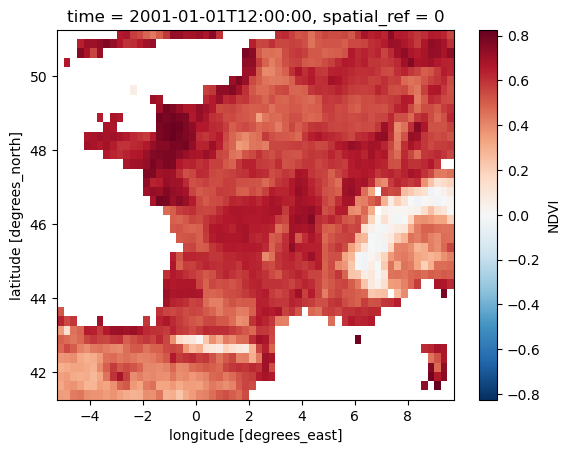

In [13]:
ds_clipped['NDVI'].isel(time=0).plot()

In [16]:
image_dataset = np.array(ds_clipped.to_array())

In [20]:
image_dataset.shape

(35, 966, 40, 60)